In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson, odeint
from const import *

0.07457506622790444


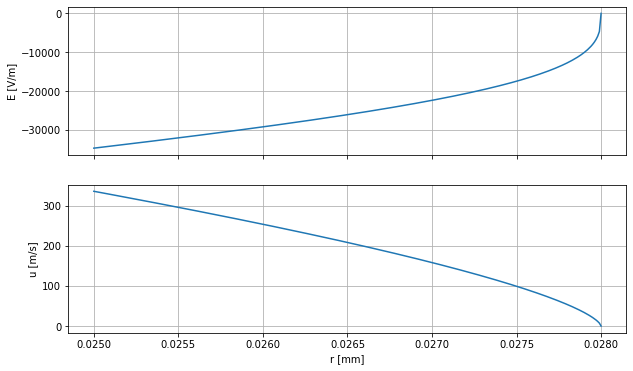

In [11]:
rp= 25e-6
J = 10
uB = 0.01
s = 0.12*25e-6

def cylindrical_sheath(s):
    R = rp + s
    r_list = np.linspace(R, rp, 300)
    def fun(y, r):
        return [R*J/(r*epsilon_0*y[1]) - y[0]/r, e*y[0]/(Mp*y[1])]

    sol = odeint(fun, y0=[0, uB], t=r_list)
    V = simpson(sol[:, 0], r_list)
    return sol[:, 0], sol[:, 1], V, r_list

def child_law(s):
    V = (9/4/epsilon_0*J*s**2*np.sqrt(Mp/2/e))**(2/3)
    return V

E, u, V, r_list = cylindrical_sheath(s)

plt.subplots(figsize=(10,6))
ax1 = plt.subplot(2,1,1)
plt.plot(r_list*1e3, E)
plt.ylabel('E [V/m]')
plt.xticks(visible=False)
plt.grid(True)

ax2 = plt.subplot(2,1,2,sharex=ax1)
plt.plot(r_list*1e3, u)
plt.ylabel('u [m/s]')
plt.xlabel('r [mm]')
plt.grid(True)
print(V)



array([1.00000000e-02, 7.27170817e+00, 1.15500828e+01, 1.51394375e+01,
       1.83439894e+01, 2.12899542e+01, 2.40451302e+01, 2.66512476e+01,
       2.91362944e+01, 3.15201927e+01, 3.38177592e+01, 3.60403910e+01,
       3.81970927e+01, 4.02951352e+01, 4.23404963e+01, 4.43381661e+01,
       4.62923650e+01, 4.82067024e+01, 5.00842962e+01, 5.19278628e+01,
       5.37397873e+01, 5.55221780e+01, 5.72769106e+01, 5.90056628e+01,
       6.07099431e+01, 6.23911141e+01, 6.40504117e+01, 6.56889615e+01,
       6.73077923e+01, 6.89078474e+01, 7.04899945e+01, 7.20550341e+01,
       7.36037066e+01, 7.51366988e+01, 7.66546489e+01, 7.81581514e+01,
       7.96477614e+01, 8.11239983e+01, 8.25873483e+01, 8.40382683e+01,
       8.54771876e+01, 8.69045109e+01, 8.83206195e+01, 8.97258738e+01,
       9.11206146e+01, 9.25051648e+01, 9.38798303e+01, 9.52449017e+01,
       9.66006553e+01, 9.79473537e+01, 9.92852472e+01, 1.00614575e+02,
       1.01935563e+02, 1.03248431e+02, 1.04553385e+02, 1.05850625e+02,
      

In [27]:
10**(np.log10(rp)-1)/rp

0.09999999999999996

In [28]:
s_list = np.logspace(np.log10(rp)-3, np.log10(rp)+2, 10000)
#s_list = np.linspace(1e-4*rp, 1e3*rp, 10000)
V_list = []
V_child_list = []

for s in s_list:
    V_list.append(cylindrical_sheath(s)[2])
    V_child_list.append(child_law(s))

V_list = np.array(V_list)
V_child_list = np.array(V_child_list)

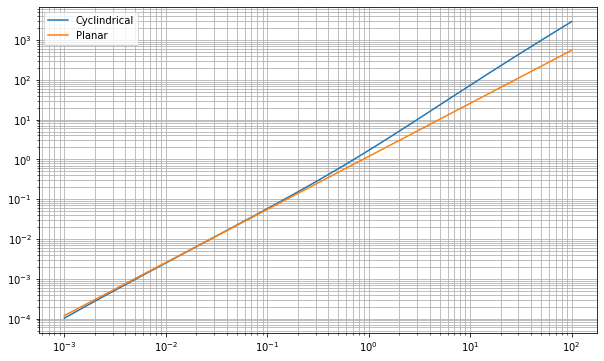

In [31]:
plt.figure(figsize=(10,6))
plt.plot((s_list)/rp, V_list)
plt.plot((s_list)/rp, V_child_list)

plt.legend(['Cyclindrical', 'Planar'])
plt.xscale('log')
plt.yscale('log')
plt.xticks()
#plt.xlim(1e-2,1e1)
#plt.ylim(1e-2,1e2)
plt.grid(True, 'both')

In [30]:
s_list/rp

array([1.00000000e-03, 1.00115207e-03, 1.00230547e-03, ...,
       9.97699834e+01, 9.98849255e+01, 1.00000000e+02])